In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK, Roots;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
3e21 * 0.001, # Doping states' density (cm^-3)
0.29 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-0.62, # Fermi level (J)
0.1, # Intrinsic semiconductor's gaussian width (J)
0.1, # Doping states' gaussian width (J)
);

F = -5.3e4; # Field (V.cm^-1)
T = 300;

In [3]:
ratio = [0.001 * 5i for i in 0:1:15];
charge = [];

p() = quadgk(
    r -> Conduction.DOS(semiconductor, r, T) * Conduction.F(semiconductor, r, T) * Conduction.k * T,
    -Inf,
    Inf
)[1];

In [ ]:
res = [];

for i in ratio
    semiconductor.Nd = semiconductor.Ni * i;
    append!(charge, p())
    append!(res, Conduction.overallDiffusion(semiconductor, T, F, 20));
end


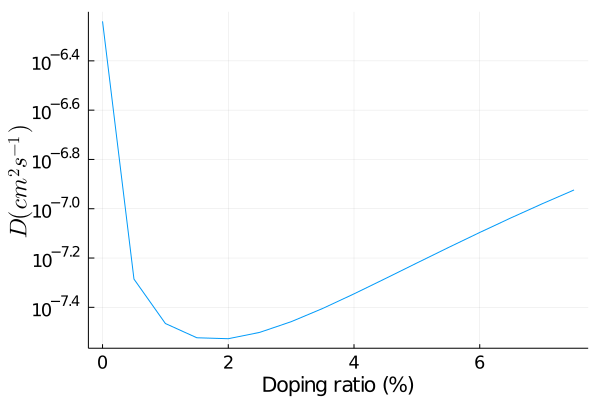

In [ ]:
plot(ratio[1:end] .* 100, res[1:end], yaxis=:log, xlabel="Doping ratio (%)", ylabel=L"D(cm^2 s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [ ]:
res_mobi = [];

for i in ratio
    semiconductor.Nd = semiconductor.Ni * i;
    append!(res_mobi, Conduction.overallMobility(semiconductor, T, F, 20));
end

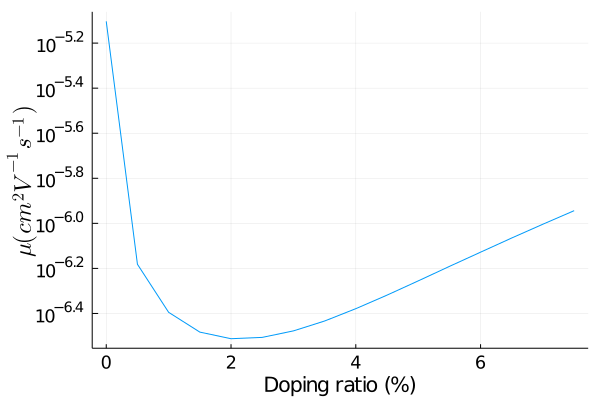

In [ ]:
plot(ratio[1:end] .* 100, res_mobi[1:end], yaxis=:log, xlabel="Doping ratio (%)", ylabel=L"\mu(cm^2 V^{-1}s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [ ]:
res_ein = [];

for i in ratio
    semiconductor.Nd = semiconductor.Ni * i;
    append!(res_ein, Conduction.overallEin(semiconductor, T, F, 20));
end

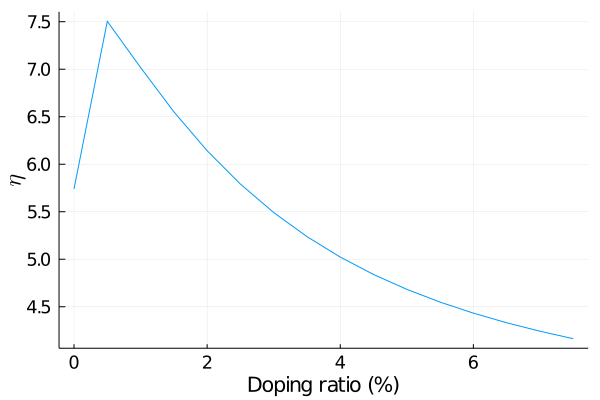

In [ ]:
plot(ratio[1:end] .* 100, res_ein[1:end] / (Conduction.k * T / Conduction.q),  xlabel="Doping ratio (%)", ylabel=L"\eta", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [28]:
function quantityCarrier(x)
    semiconductor.Ni = x;
    semiconductor.Nd = 0.001 * x;
    return p()
end

function find_multiple_zeros(x)
    density = (r -> find_zero(z -> quantityCarrier(z) - r, 1e20)).(x)
    return density
end
range = vcat([[i for i in 1:9] .* 10^i for i in 16:1:17]...);
densities = find_multiple_zeros(range);

In [5]:
res_2 = [];

for x in densities
    semiconductor.Ni = x;
    semiconductor.Nd = 0.001 * x;
    append!(res_2, Conduction.overallDiffusion(semiconductor, T, F, 20));
end

In [6]:
res_mobi_2 = [];

for x in densities
    semiconductor.Ni = x;
    semiconductor.Nd = 0.001 * x;
    append!(res_mobi_2, Conduction.overallMobility(semiconductor, T, F, 20));
end

In [7]:
res_ein_2 = [];

for x in densities
    semiconductor.Ni = x;
    semiconductor.Nd = 0.001 * x;
    append!(res_ein_2, Conduction.overallEin(semiconductor, T, F, 20));
end

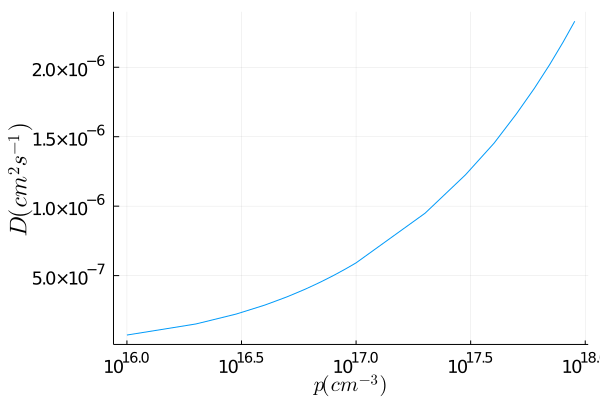

In [8]:
plot(range, res_2, xlabel=L"p (cm^{-3})", ylabel=L"D(cm^2 s^{-1})", xaxis=:log, label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

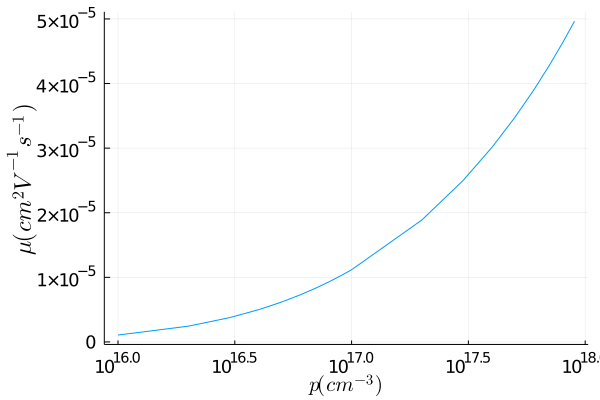

In [9]:
plot(range, res_mobi_2, xlabel=L"p (cm^{-3})", ylabel=L"\mu(cm^2 V^{-1}s^{-1})", xaxis=:log, label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)


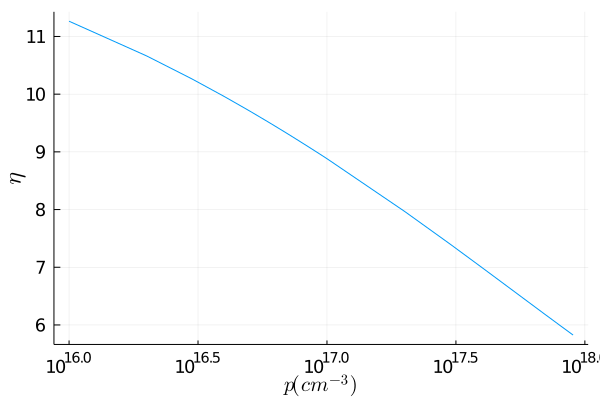

In [10]:
plot(range, res_ein_2 ./ (Conduction.k * T / Conduction.q), xlabel=L"p (cm^{-3})", ylabel=L"\eta", xaxis=:log, label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)


In [52]:
semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.29 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-0.62, # Fermi level (J)
0.1, # Intrinsic semiconductor's gaussian width (J)
0.1, # Doping states' gaussian width (J)
);

F = -5.3e4; # Field (V.cm^-1)
T = 300;

In [69]:
range = vcat([[1, 4, 6, 8] * 10^i for i in 14:17]...)

densities_2 = find_multiple_zeros(range);
res_ein_3 = [];

for x in densities_2
    semiconductor.Ni = x;
    append!(res_ein_3, Conduction.overallEin(semiconductor, T, F, 20));
end

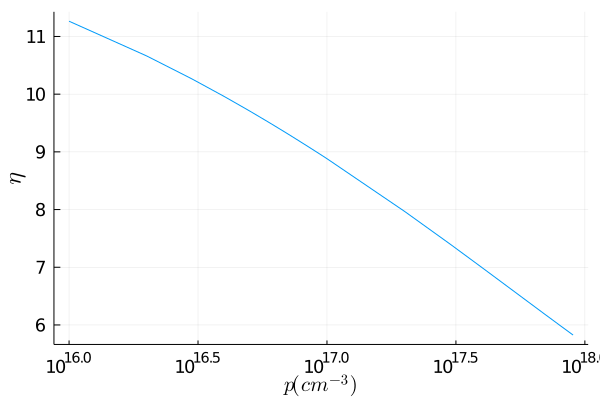

In [16]:
plot(range, [res_ein_2 ./ (Conduction.k * T / Conduction.q)], xlabel=L"p (cm^{-3})", ylabel=L"\eta", xaxis=:log, label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [75]:
range = vcat([[1, 4, 6, 8] * 10^i for i in 14:17]...)

densities_2 = find_multiple_zeros(range);
res_ein_3 = [];

for x in densities_2
    semiconductor.Ni = x;
    append!(res_ein_3, Conduction.overallEin(semiconductor, T, F, 20));
end

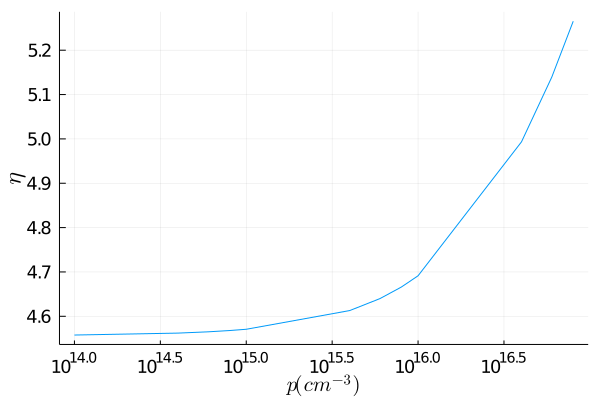

In [77]:
plot(range[1:end-4], [res_ein_3[1:end-4] ./ (Conduction.k * T / Conduction.q)], xlabel=L"p (cm^{-3})", ylabel=L"\eta", xaxis=:log, label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)
